<a href="https://colab.research.google.com/github/muajnstu/Large_Scale_Implementation_of_DSK_Chain/blob/main/Data_Preparation_of_Fraud_Transaction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from scipy.stats import randint, uniform

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/muajnstu/ML-Datasets/refs/heads/main/Fraudulent_E-Commerce_Transaction_Data_2.csv')
df.head()

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15


In [3]:
df['Address Match'] = (df['Shipping Address'] == df['Billing Address']).astype(int)

In [4]:
df = df.drop(["Transaction ID","Customer ID","Transaction Date","IP Address","Shipping Address","Billing Address"], axis=1)


In [5]:

categorical = df.select_dtypes(include=['object']).columns.tolist()
categorical

['Payment Method', 'Product Category', 'Customer Location', 'Device Used']

In [6]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(df[['Payment Method','Product Category','Device Used']])
encoded_data = encoder.transform(df[['Payment Method','Product Category','Device Used']])

location_counts = df['Customer Location'].value_counts()
df['Customer Location Encoded'] = df['Customer Location'].map(location_counts)

encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(['Payment Method','Product Category','Device Used']))
df = pd.concat([df, encoded_df], axis=1)
df.drop(['Payment Method','Product Category','Device Used','Customer Location'], axis=1, inplace=True)

In [7]:
df

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour,Address Match,Customer Location Encoded,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,42.32,1,40,0,282,23,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,301.34,3,35,0,223,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,340.32,5,29,0,360,8,0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,95.77,5,45,0,325,20,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,77.45,5,42,0,116,15,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,53.73,5,32,0,363,16,1,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
23630,47.42,4,41,0,296,17,1,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
23631,1045.23,1,9,0,329,23,1,1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
23632,34.25,2,39,0,347,11,1,7,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [8]:
display(df['Is Fraudulent'].value_counts())

,count
Is Fraudulent,
0,22412
1,1222


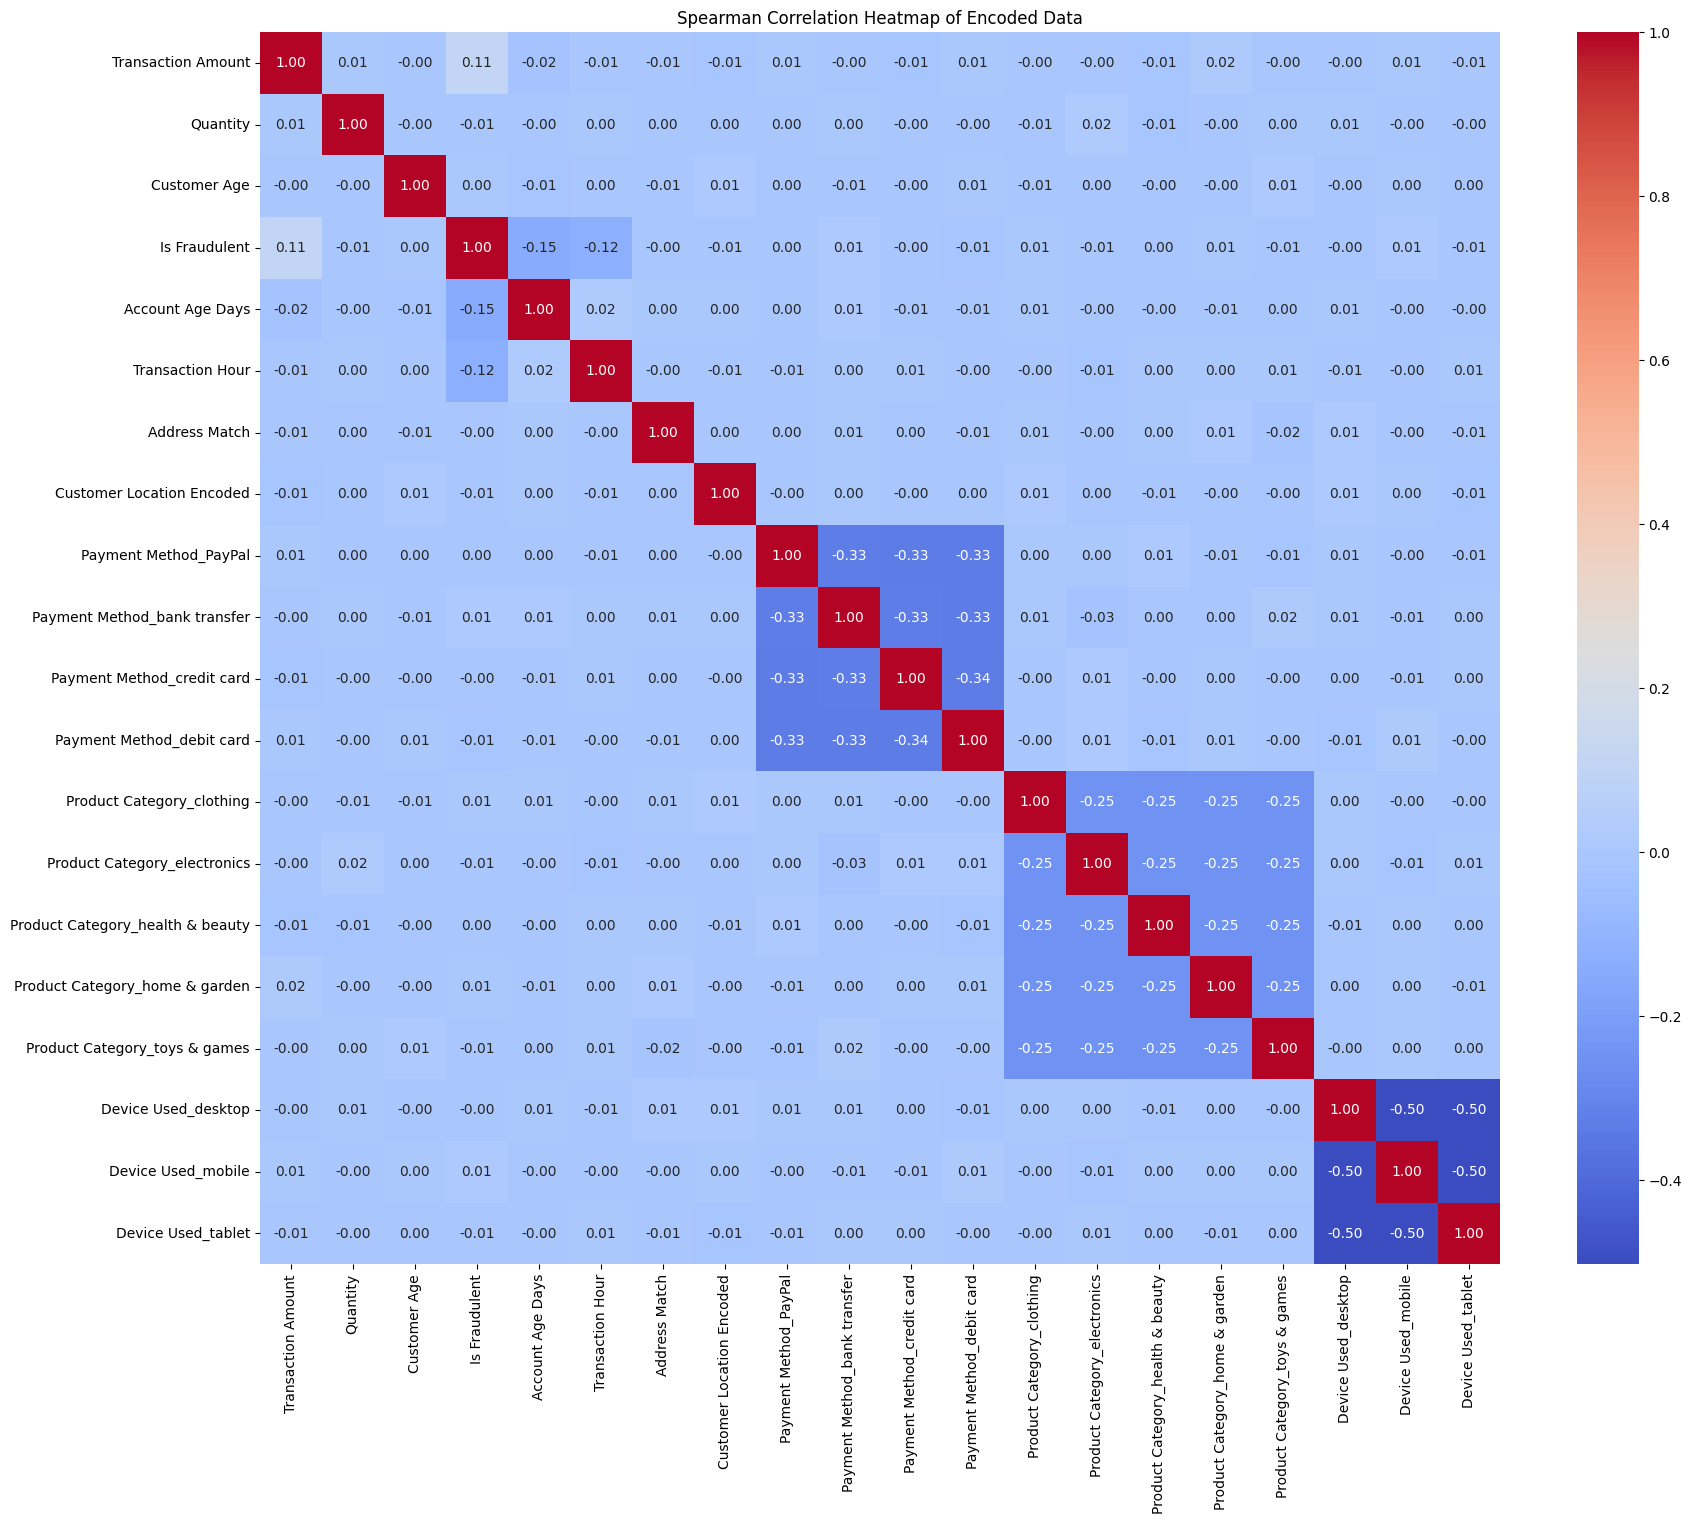


Highly correlated features (absolute Spearman correlation > 0.8):


In [9]:
# Calculate Spearman correlation matrix
corr_spearman = df.corr(method='spearman')

# Generate heatmap
plt.figure(figsize=(20, 16))
sns.heatmap(corr_spearman, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Spearman Correlation Heatmap of Encoded Data')
plt.show()

# Find highly correlated features (absolute correlation > 0.8)
threshold = 0.8
highly_correlated_features = set()
for i in range(len(corr_spearman.columns)):
    for j in range(i):
        if abs(corr_spearman.iloc[i, j]) > threshold:
            colname_i = corr_spearman.columns[i]
            colname_j = corr_spearman.columns[j]
            highly_correlated_features.add(f"{colname_i} - {colname_j}: {corr_spearman.iloc[i, j]:.2f}")

print("\nHighly correlated features (absolute Spearman correlation > 0.8):")
for feature_pair in highly_correlated_features:
    print(feature_pair)

In [10]:
# Check for low variance features
variances = df.var()
print("Feature variances:")
print(variances)

threshold = 0.01

low_variance_features = variances[variances < threshold].index.tolist()

print(f"\nFeatures with variance below {threshold}:")
print(low_variance_features)

df_processed_cleaned = df.drop(columns=low_variance_features)

print("\nDataFrame after dropping low variance features:")
display(df_processed_cleaned.head())

Feature variances:
Transaction Amount                  79550.323489
Quantity                                2.015444
Customer Age                          100.189516
Is Fraudulent                           0.049034
Account Age Days                    11532.329093
Transaction Hour                       48.729597
Address Match                           0.089279
Customer Location Encoded              10.898947
Payment Method_PayPal                   0.187307
Payment Method_bank transfer            0.186478
Payment Method_credit card              0.187814
Payment Method_debit card               0.188425
Product Category_clothing               0.159300
Product Category_electronics            0.160544
Product Category_health & beauty        0.158585
Product Category_home & garden          0.161503
Product Category_toys & games           0.160088
Device Used_desktop                     0.222863
Device Used_mobile                      0.222274
Device Used_tablet                      0.221550
d

,Transaction Amount,Quantity,Customer Age,Is Fraudulent,Account Age Days,Transaction Hour,Address Match,Customer Location Encoded,Payment Method_PayPal,Payment Method_bank transfer,Payment Method_credit card,Payment Method_debit card,Product Category_clothing,Product Category_electronics,Product Category_health & beauty,Product Category_home & garden,Product Category_toys & games,Device Used_desktop,Device Used_mobile,Device Used_tablet
0,42.32,1,40,0,282,23,1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,301.34,3,35,0,223,0,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,340.32,5,29,0,360,8,0,5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
3,95.77,5,45,0,325,20,1,1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,77.45,5,42,0,116,15,1,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [11]:
df.to_csv("fraud_trans_dataset.csv", index=False)
from google.colab import files
files.download("fraud_trans_dataset.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>